In [11]:
import collections
import numpy as npc
from sklearn import svm
import matplotlib.pyplot as plt
from evaluation import classification_accuracy

In [91]:
np.random.seed(189)
EXAMPLE_NUMBERS = [100, 200, 500, 1000, 2500, 5000, 10000]
mnist_training_data = np.load("../data/mnist_training_data.npy")
mnist_testing_data = np.load("../data/mnist_testing_data.npy")

mnist_testing_data_labels = mnist_testing_data[:, -1]
mnist_testing_data = mnist_testing_data[:, :-1]

# testing score is first value in list
results = collections.defaultdict(list)

for training_amount in EXAMPLE_NUMBERS:
    clf = svm.SVC()
    training_subset = mnist_training_data[:training_amount]
    training_subset_labels = training_subset[:, -1]
    training_subset = training_subset[:, :-1]

    clf.fit(training_subset, training_subset_labels)

    predictions = clf.predict(mnist_testing_data)
    accuracy = classification_accuracy(predictions=predictions, true_labels=mnist_testing_data_labels)
    results[training_amount].append(accuracy)

    predictions = clf.predict(training_subset)
    accuracy = classification_accuracy(predictions=predictions, true_labels=training_subset_labels)
    results[training_amount].append(accuracy)

In [ ]:
# testing_accuracies = [lst[0] for lst in results.values()]
# training_accuracies = [lst[1] for lst in results.values()]
# plt.figure(figsize=(10, 6))

# plt.bar(np.arange(len(EXAMPLE_NUMBERS)), training_accuracies, 0.3, label='Training Accuracies')
# plt.bar(np.arange(len(EXAMPLE_NUMBERS)) + 0.3, testing_accuracies, 0.3, label='Testing Accuracies')
# plt.xticks(np.arange(len(EXAMPLE_NUMBERS)) + 0.3 / 2, EXAMPLE_NUMBERS)
# for i, value in enumerate(training_accuracies):
#     plt.text(i, value + 0.02, f'{value:.2f}', ha='center', fontsize=10)
# for i, value in enumerate(testing_accuracies):
#     plt.text(i + 0.3, value + 0.02, f'{value:.2f}', ha='center', fontsize=10)

# plt.xlabel('Number of training examples')
# plt.ylabel('Classification accuracy')
# plt.title('MNIST SVM Training examples vs classification accuracy (truncated to int)')
# plt.legend(loc='lower right')

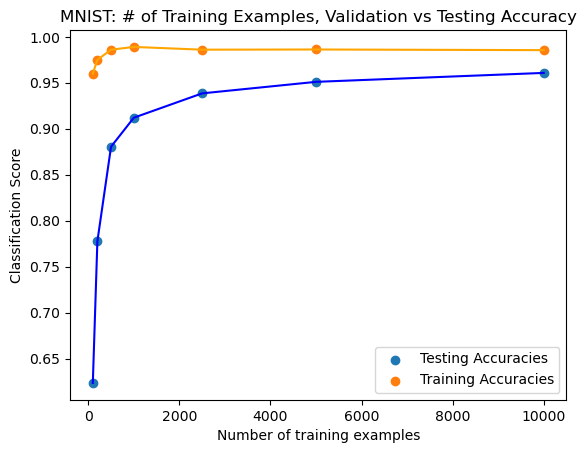

In [105]:
testing_accuracies = [lst[0] for lst in results.values()]
training_accuracies = [lst[1] for lst in results.values()]
plt.scatter(EXAMPLE_NUMBERS, testing_accuracies, label='Testing Accuracies')
plt.scatter(EXAMPLE_NUMBERS, training_accuracies, label='Training Accuracies')

plt.plot(EXAMPLE_NUMBERS, testing_accuracies, color='blue')
plt.plot(EXAMPLE_NUMBERS, training_accuracies, color='orange')
plt.xlabel("Number of training examples")
plt.ylabel("Classification Score")
plt.title("MNIST: # of Training Examples, Validation vs Testing Accuracy")

plt.legend()

In [95]:
spam_training_data = np.load("../data/spam_training_data.npy")
spam_testing_data = np.load("../data/spam_testing_data.npy")

spam_testing_data_labels = spam_testing_data[:, -1]
spam_testing_data = spam_testing_data[:, :-1]

EXAMPLE_NUMBERS = [100, 200, 500, 1000, 2000, spam_training_data.shape[0]]

spam_results = collections.defaultdict(list)

for training_amount in EXAMPLE_NUMBERS:

    clf = svm.SVC()
    training_subset = spam_training_data[:training_amount]
    training_subset_labels = training_subset[:, -1]
    training_subset = training_subset[:, :-1]

    clf.fit(training_subset, training_subset_labels)

    predictions = clf.predict(spam_testing_data)
    accuracy = classification_accuracy(predictions=predictions, true_labels=spam_testing_data_labels)
    spam_results[training_amount].append(accuracy)

    predictions = clf.predict(training_subset)
    accuracy = classification_accuracy(predictions=predictions, true_labels=training_subset_labels)
    spam_results[training_amount].append(accuracy)

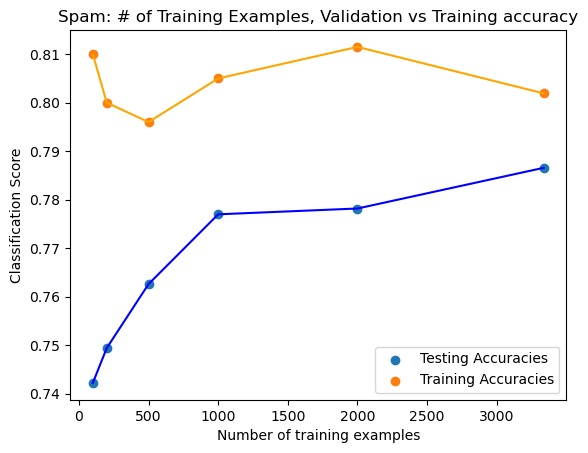

In [96]:
testing_accuracies = [lst[0] for lst in spam_results.values()]
training_accuracies = [lst[1] for lst in spam_results.values()]

plt.scatter(EXAMPLE_NUMBERS, testing_accuracies, label='Testing Accuracies')
plt.scatter(EXAMPLE_NUMBERS, training_accuracies, label='Training Accuracies')

plt.plot(EXAMPLE_NUMBERS, testing_accuracies, color='blue')
plt.plot(EXAMPLE_NUMBERS, training_accuracies, color='orange')
plt.xlabel("Number of training examples")
plt.ylabel("Classification Score")
plt.title("Spam: # of Training Examples, Validation vs Training accuracy")
plt.legend()

In [102]:
C_LIST = [0.1 * (10 ** power) for power in range(8)]

c_results = collections.defaultdict(list)
tenk_mnist = mnist_training_data[:10000]
tenk_mnist_labels = tenk_mnist[:, -1]
tenk_mnist = tenk_mnist[:, :-1]

for c in C_LIST:
    clf = svm.SVC(C=c)
    clf.fit(tenk_mnist, tenk_mnist_labels)

    predictions = clf.predict(mnist_testing_data)
    accuracy = classification_accuracy(predictions=predictions, true_labels=mnist_testing_data_labels)
    c_results[c].append(accuracy)

    predictions = clf.predict(tenk_mnist)
    accuracy = classification_accuracy(predictions=predictions, true_labels=tenk_mnist_labels)
    c_results[c].append(accuracy)


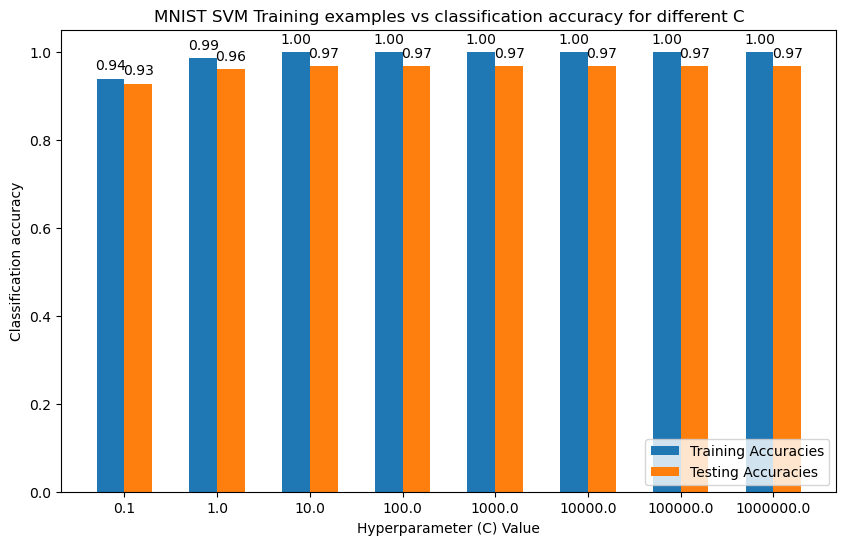

In [103]:
testing_accuracies = [lst[0] for lst in c_results.values()]
training_accuracies = [lst[1] for lst in c_results.values()]
plt.figure(figsize=(10, 6))

plt.bar(np.arange(len(C_LIST)), training_accuracies, 0.3, label='Training Accuracies')
plt.bar(np.arange(len(C_LIST)) + 0.3, testing_accuracies, 0.3, label='Testing Accuracies')
plt.xticks(np.arange(len(C_LIST)) + 0.3 / 2, C_LIST)
for i, value in enumerate(training_accuracies):
    plt.text(i, value + 0.02, f'{value:.2f}', ha='center', fontsize=10)
for i, value in enumerate(testing_accuracies):
    plt.text(i + 0.3, value + 0.02, f'{value:.2f}', ha='center', fontsize=10)

plt.xlabel('Hyperparameter (C) Value')
plt.ylabel('Classification accuracy')
plt.title('MNIST SVM Training examples vs classification accuracy for different C')
plt.legend(loc='lower right')

In [110]:
C_LIST = [0.1 * (10 ** power) for power in range(8)]

c_fold_results = collections.defaultdict(list)
fold_length = spam_training_data.shape[0] // 5
fold_accuracies = {}

for c in C_LIST:
    folds = []
    np.random.shuffle(spam_training_data)
    for fold_num in range(5):
        start_index = fold_num * fold_length
        end_index = start_index + fold_length
        if fold_num == 4:
            end_index = spam_training_data.shape[0]
        fold_subset = spam_training_data[start_index:end_index]
        fold_subset_labels = fold_subset[:, -1]
        fold_subset = fold_subset[:, :-1]
        folds.append((fold_subset, fold_subset_labels))
    
    accuracies = []
    for i in range(5):
        curr = folds[i]
        ahead = folds[i + 1] if i + 1 < len(folds) else folds[0]
        curr_data, curr_labels = curr[0], curr[1]
        ahead_data, ahead_labels = ahead[0], ahead[1]

        clf = svm.SVC(C=c)
        clf.fit(curr_data, curr_labels)
        predictions = clf.predict(ahead_data)
        accuracy = classification_accuracy(predictions=predictions, true_labels=ahead_labels)
        accuracies.append(accuracy)

    averaged_accuracy = sum(accuracies) / len(folds)
    fold_accuracies[c] = averaged_accuracy


In [111]:
fold_accuracies

{0.1: 0.7183067658995614,
 1.0: 0.7707554294601578,
 10.0: 0.78932372378833,
 100.0: 0.8049168240991612,
 1000.0: 0.8070103961472178,
 10000.0: 0.7911317883659067,
 100000.0: 0.7875317946407961,
 1000000.0: 0.7914163994236066}